#### Context:

##### Bank Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.



#### Content: 


##### Bank Client Data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):

17 - y - has the client subscribed a term deposit? (1, 2: "no","yes")

##### Aim: 

This Dataset is contains of information about the customers whom having account in a client's bank. It contains the person's data along whether the customer is subscribed to Bank Term Deposit or not. By analysing and creating model over this data, we can classify the customer will deposit a sum of amount to bank or not.


##### Solution: 

This problem is solved with the help of Classification based on Supervised Machine Learning Algorithm. We have various algorithms to solve this problem like Logistic Regression, Decision Tree, Random Forest, etc.,


##### Working Procedure:

The data has to be cleaned so that we can earn accurate and reliable results. The preprocessing and cleansing includes the description about the dataset like statistical description, information, Checking for Null Values if there we need to treat those, whether the feature is Categorical or Numerical, if Categorical we have two kinds of encoding LabelEncoding and OneHotEncoding, if we are dealing with Distance based approach Feature Scaling is needed for faster and easy calculation. Then the data is fitted over various model's, so that we can analyse how various model performing on the given dataset. From the report we can analyse the performance and metrics of various models, thereby we can pick best model and if it overfits we can tune the model accordingly to get better results.





In [1]:
# Primary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, recall_score
from sklearn.metrics import auc, roc_curve

warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('Bank Marketing.csv')
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [3]:
def info(data) :
        # Basic Information about the dataset
        data.info()

        # Dimensions of dataset
        print('Shape of The dataset: ', data.shape)
        print('Total Size of the dataset: ', data.size)
        print('Dimensions of dataset: ', data.ndim)


        # Descriptive Statistics of Numerical Columns
        num_des = pd.DataFrame(data.describe())
        print('\nExporting')
        print('Descriptive Statistical Report for Numerical Columns')
        num_des.to_excel('Statistical Report.xlsx')


        # Quantify the Numerical Columns and Categorical Columns
        num_cols = data.select_dtypes(include = ['int64', 'int32', 'int16','float64', 'float32', 'float16']).columns
        print('\nNumerical Columns: ', num_cols.values)
        print('Number of Numerical Columns in the dataset: ', num_cols.nunique())

        cat_cols = data.select_dtypes(include = ['object', 'category']).columns
        print('\nCategorical Columns: ', cat_cols.values)
        print('Number of Categorical Columns in the dataset: ', cat_cols.nunique())


        # Quantifying Percentage of Missing Values in the dataset
        Null = pd.DataFrame(round(data.isnull().mean() * 100 , 2), columns = ['Percentage'])
        print('\n\nPercentage of Null Values in the dataset: \n',Null)

        # Determining Cardinality
        cardinality = pd.DataFrame(data.select_dtypes(['object','category']).nunique(), columns= ['Counts'])
        print('\n\nCardinality: \n', cardinality)

In [4]:
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

Our Dataset contains of 50% of Features as Categorical Features. 

And Contains No Null values.

##### EDA

1) Relation between Customer who is working in various **Sectors** and their **Balance in (Euros)** ?

<AxesSubplot:xlabel='Job', ylabel='Balance (euros)'>

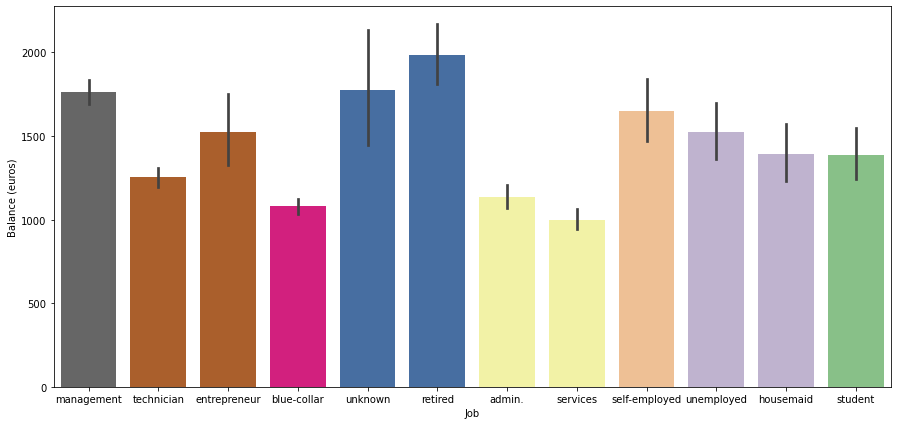

In [5]:
plt.figure(figsize= (15,7))
sns.barplot(data = data, x = 'Job', y = 'Balance (euros)', palette= 'Accent_r')

Retired People is holding average balance of 1800+ euros, because they may have Special Benefit amounts, Savings. After them majority who holds large amount of money as their bank balance is Management and Unknown Category.

Person who working in Administration Sector, Serive and Blue - Collar Jobs, is having holding very less amount of Balance in Bank.


2) Which Sectorized People is having **Subscription** and **Not having Subscription** ? 

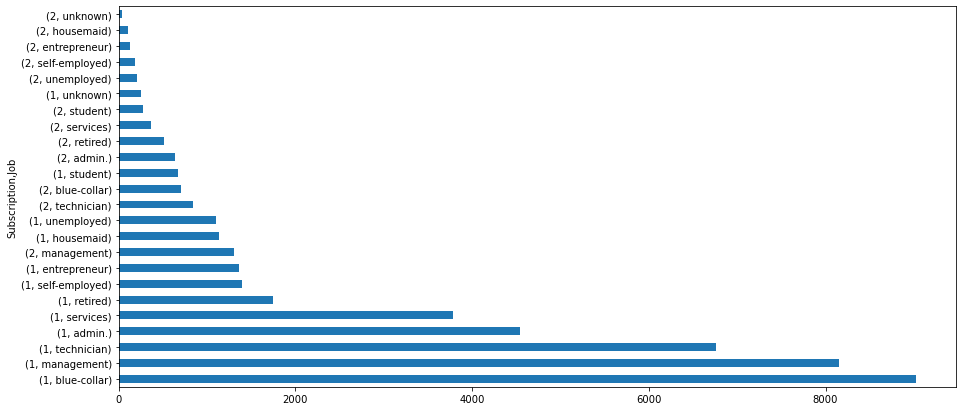

In [6]:
plt.figure(figsize= (15,7))
data[['Subscription','Job']].value_counts().plot.barh();


From this we can infer that Majority who is not Subscribing is person who is engaging in Blue-Collar Job.

3) Concentration of **Age** in Banking Data ?

<AxesSubplot:xlabel='Age', ylabel='count'>

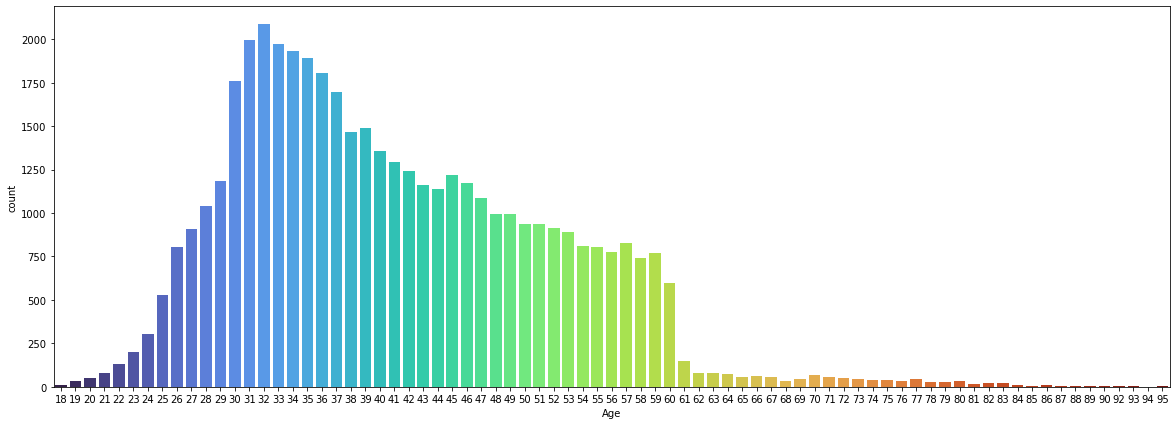

In [7]:
plt.figure(figsize = (20,7))
sns.countplot(data= data, x = 'Age', palette= 'turbo')

We can see the trend that people who is active with bank is working in certain sectors, because they have to rely on bank for their monthly credit, and the trend goes on downphase when the person age is above 60.

4) Study of Customer having **Housing Loan** and **Personal Loan** on basis of **Age** ?

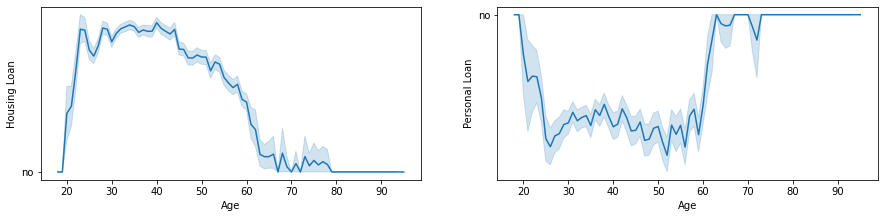

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.lineplot(data  = data, x = 'Age', y = 'Housing Loan')

plt.subplot(2,2,2)
sns.lineplot(data = data, x = 'Age', y = 'Personal Loan');


5) Check for **Outliers** in the given Dataset ?

<AxesSubplot:>

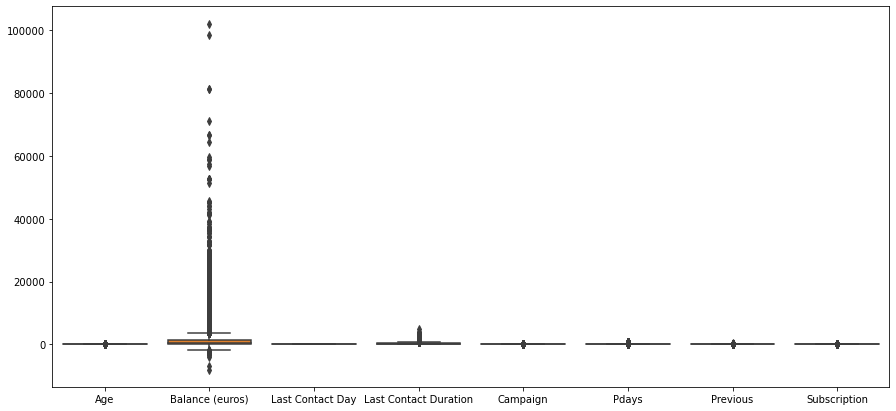

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(data = data)

6) How a Feature called **Balance (Euros)** distributed ?

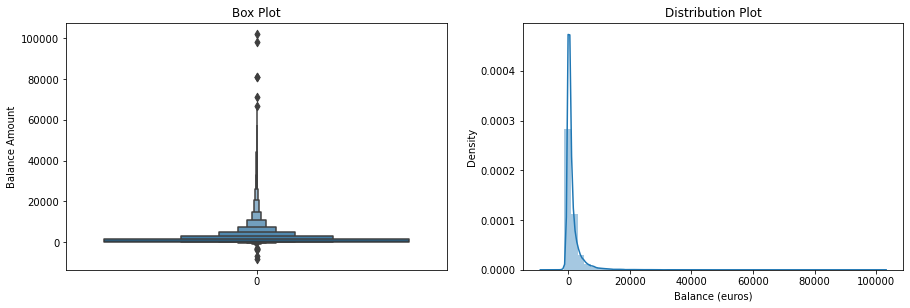

In [10]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.boxenplot(data = data['Balance (euros)'])
plt.ylabel('Balance Amount')
plt.title('Box Plot')

plt.subplot(2,2,2)
sns.distplot(data['Balance (euros)'])
plt.title('Distribution Plot');

Here in Balance of Customers are ranging as Outliers. But while I consider a amount not everyone holds high bank balance, so even though they are Outliers they are the most valuable Customers for the Bank. Hence I didn't treat those Outliers.

7) Relation between **Job** and **Credit** ?

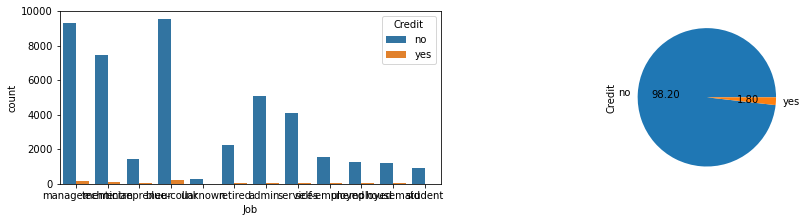

In [11]:
plt.figure(figsize=(15,7))


plt.subplot(2,2,1)
sns.countplot(data = data, x = 'Job', hue= 'Credit')
plt.subplot(2,2,2)
data['Credit'].value_counts(normalize= True).plot.pie(radius = 1, autopct='%.2f');



Very less number of people having credit, By analysing the Number of Customer having frequent Credit is very less.

8) Relation between **Marital Status** and **Subscription** ? 

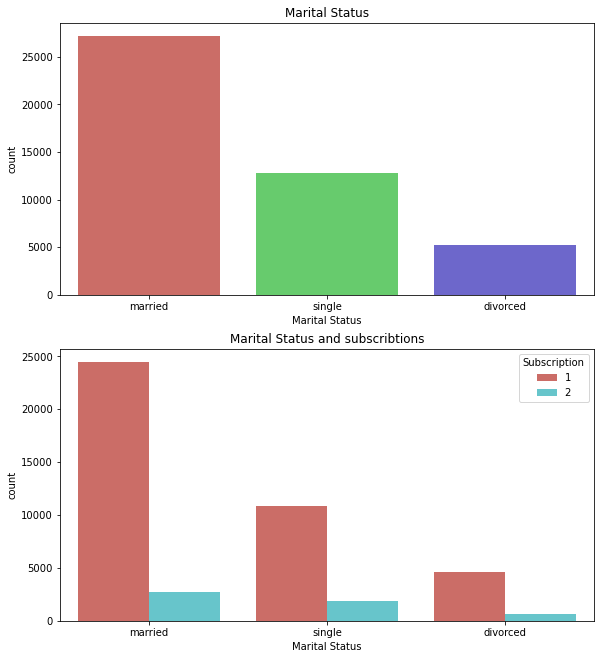

In [12]:
fig = plt.figure(figsize=(20,17))

ax= [None for _ in range(2)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)


sns.countplot(data= data, x='Marital Status', order= data['Marital Status'].value_counts().index, palette='hls', ax=ax[0] )
sns.countplot(data=data, x= 'Marital Status', hue = 'Subscription', order= data['Marital Status'].value_counts().index, palette='hls', ax= ax[1])

ax[0].set_title('Marital Status')
ax[1].set_title('Marital Status and subscribtions')
plt.show()

9) Month of more concentration where the Banking Personnel is Contacted with Customers?

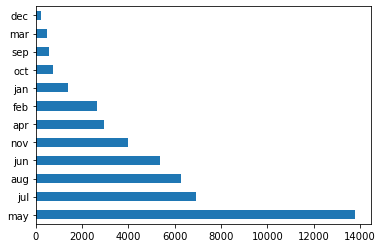

In [13]:
data['Last Contact Month'].value_counts().plot.barh();

10) How many Customers were buy **Subscription** based on the approach of Banking Personel ?

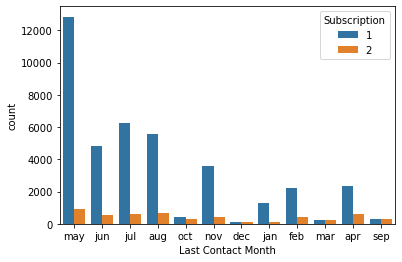

In [14]:
sns.countplot(data = data, x = 'Last Contact Month', hue = 'Subscription');

11. **Jobs and Subscription**

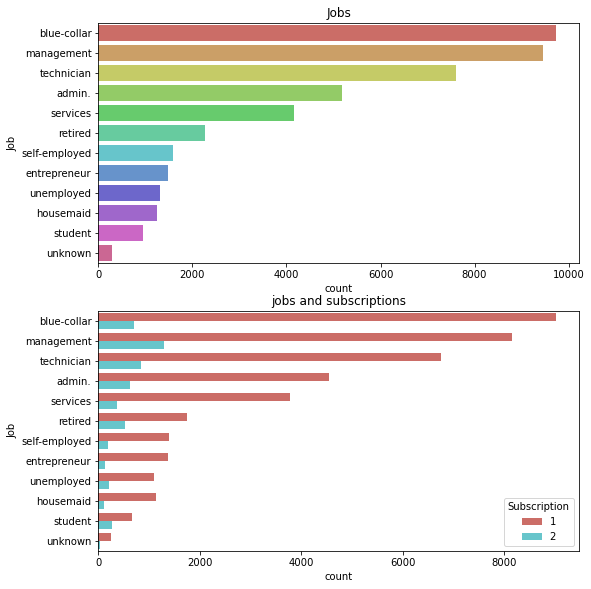

In [15]:
fig = plt.figure(figsize=(18,15))

ax= [None for _ in range(2)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)


sns.countplot(data= data, y='Job', order= data['Job'].value_counts().index, palette='hls', ax=ax[0] )
sns.countplot(data= data, y ='Job', hue = 'Subscription', order= data['Job'].value_counts().index, palette='hls', ax= ax[1])

ax[0].set_title('Jobs')
ax[1].set_title('jobs and subscriptions')
plt.show()

12. **Credit and Subscriptions**

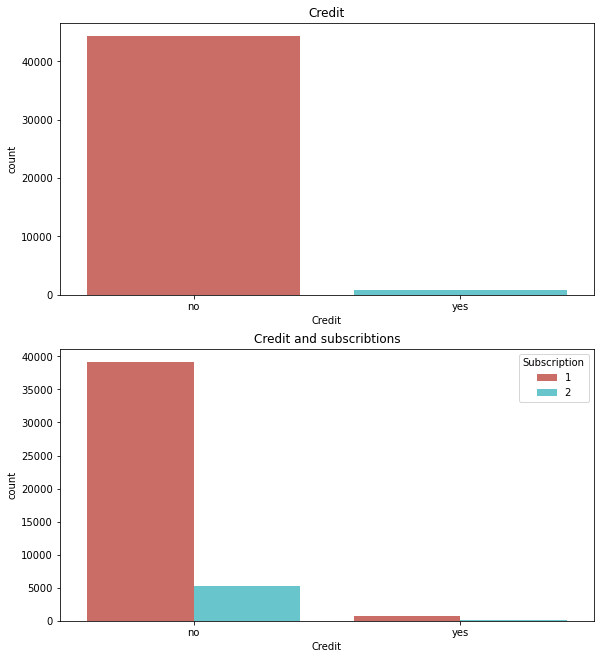

In [16]:
fig = plt.figure(figsize=(20,17))

ax= [None for _ in range(2)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)


sns.countplot(data= data, x=data['Credit'],palette='hls', ax=ax[0] )
sns.countplot(data=data, x= data['Credit'], hue = data['Subscription'],palette='hls' , ax= ax[1])

ax[0].set_title('Credit')
ax[1].set_title('Credit and subscribtions')
plt.show()

13. Balance and Subscription

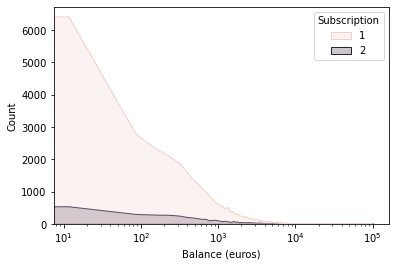

In [17]:
sns.histplot(data=data[['Balance (euros)','Subscription']],x='Balance (euros)',element='poly', hue='Subscription')
plt.xscale('log')
plt.show()

14) Variance Covariance Plot - **Pairplot**

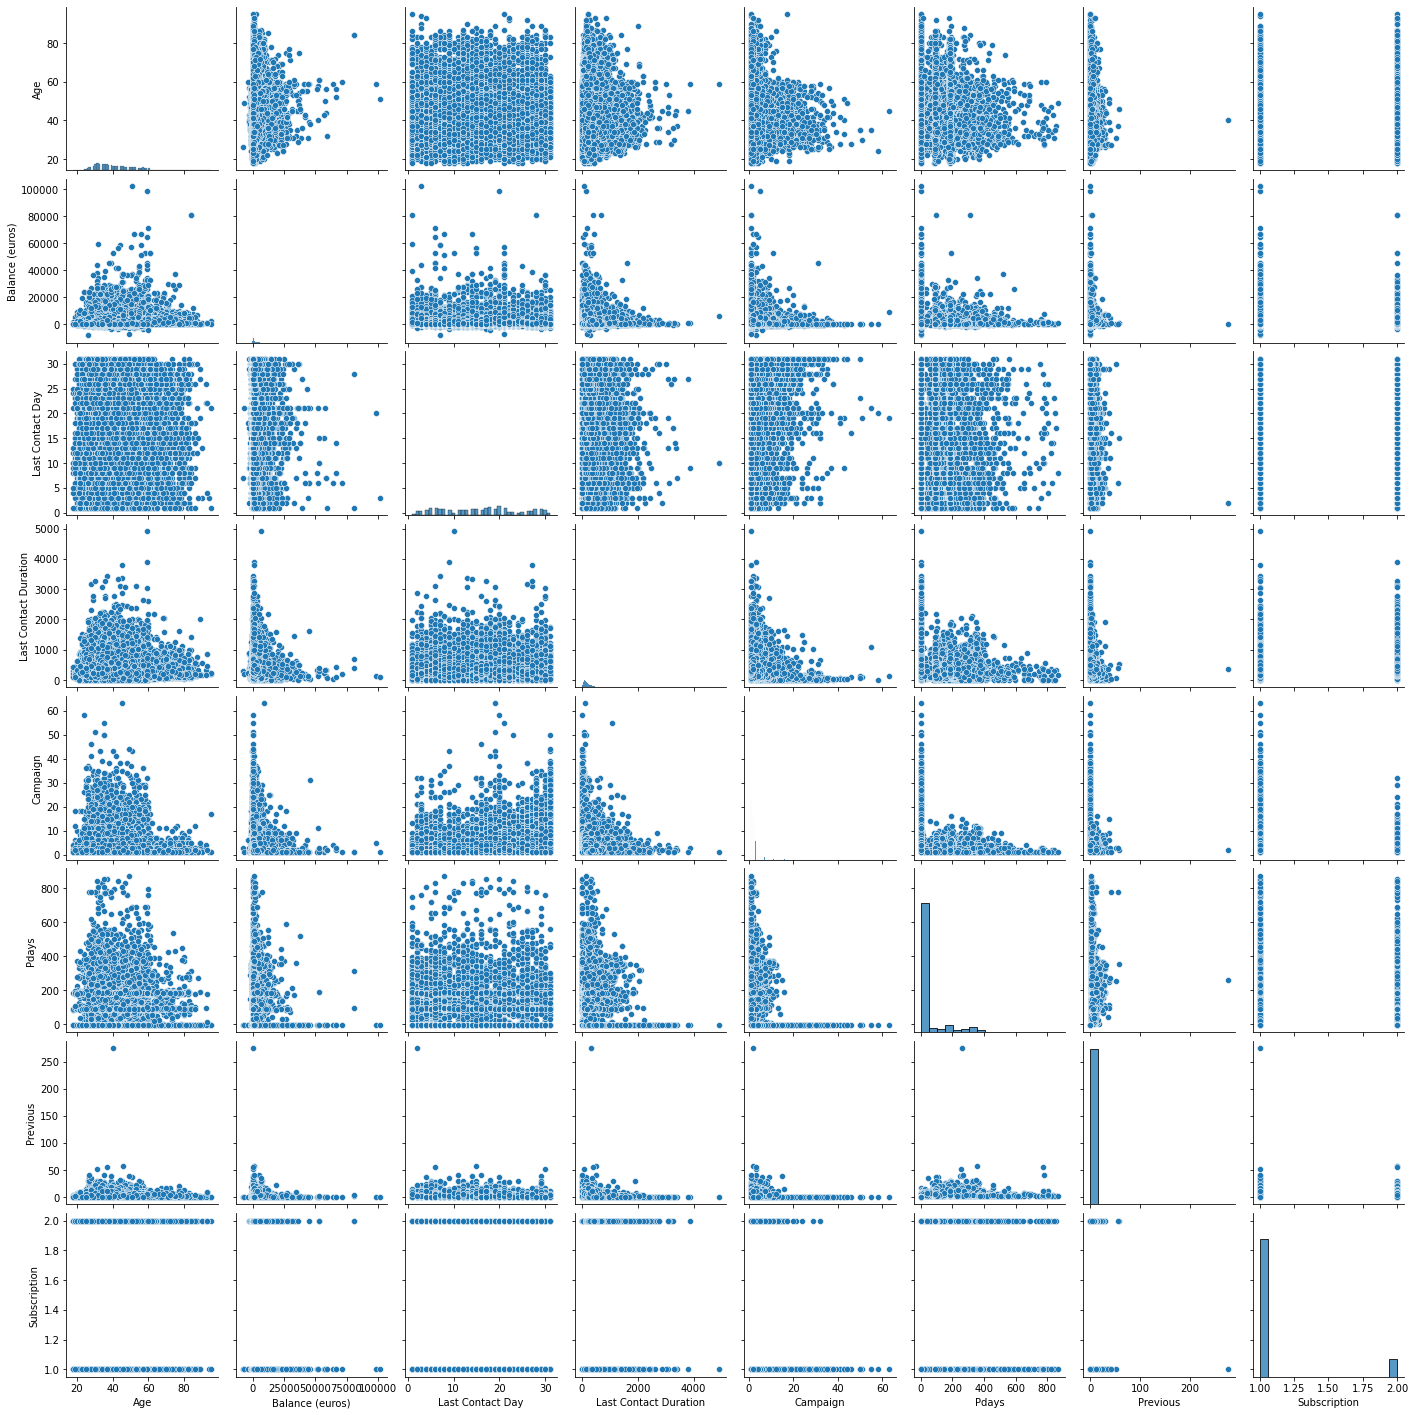

In [18]:
sns.pairplot(data = data)

15) **Correlation Map**

<AxesSubplot:>

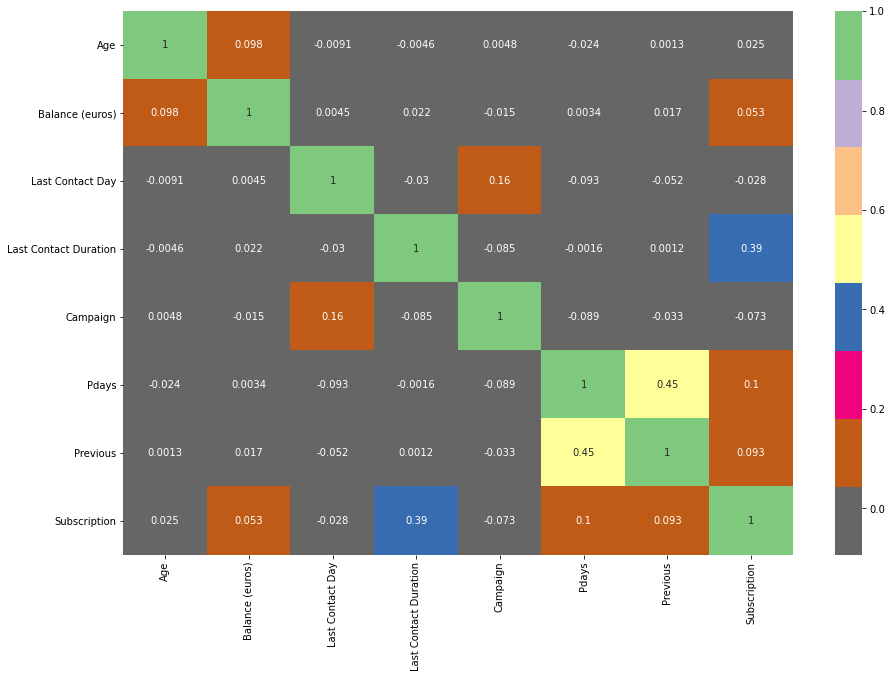

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Accent_r')

**Prevalance Rate** of Dependent Variable

In [20]:
data['Subscription'].value_counts(normalize= True)

1    0.883015
2    0.116985
Name: Subscription, dtype: float64

##### Feature Engineering - Preprocesssing 

**Feature Encoding**

In [21]:
cat = data.select_dtypes(['object'])
for i in cat.columns:
    print(f'\n{i} contains of unique values: {cat[i].unique()}')


Job contains of unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Marital Status contains of unique values: ['married' 'single' 'divorced']

Education contains of unique values: ['tertiary' 'secondary' 'unknown' 'primary']

Credit contains of unique values: ['no' 'yes']

Housing Loan contains of unique values: ['yes' 'no']

Personal Loan contains of unique values: ['no' 'yes']

Contact contains of unique values: ['unknown' 'cellular' 'telephone']

Last Contact Month contains of unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Poutcome contains of unique values: ['unknown' 'failure' 'other' 'success']


In [22]:
cat.columns

Index(['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan',
       'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome'],
      dtype='object')

In [23]:
lb = LabelEncoder()
for i in cat.columns:
    data[i] = lb.fit_transform(data[i])


In [24]:
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,1


**Seperating Dependent and Independent variable**

In [25]:
x = data.drop(['Subscription'], axis = 1)
y = data.Subscription

**Train Test Split**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y)

**Feature Scaling**

In [27]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)


##### Model Building

In [28]:
def metrics(a,b):
    cm = confusion_matrix(a,b)
    print('Confusion Matrix: \n',cm)
    cr = classification_report(a,b)
    print('Classification Report: \n',cr)
    print(f'Accuracy Score: {accuracy_score(a,b)}')

In [29]:
report = pd.DataFrame(columns = ['Model', 'Train Accuracy','Test Accuracy','Cohen-Kappa Score','Recall', 'Mean Score'])

**Logistic Regression**

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)
y_pred1 = lr.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

acc_lr_train = accuracy_score(y_train, y_pred)
acc_lr_test = accuracy_score(y_test, y_pred1)

cv_lr = cross_val_score(lr, x_train, y_train, cv = 5)
print(f'Mean Score of Logistic Model: {cv_lr.mean()}')

report = report.append({'Model': 'Logistic Regression',
                        'Train Accuracy': acc_lr_train,
                        'Test Accuracy': acc_lr_test,
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_lr.mean()}, ignore_index= True)


Train Metrics
Confusion Matrix: 
 [[27500   445]
 [ 3001   701]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.98      0.94     27945
           2       0.61      0.19      0.29      3702

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.86     31647

Accuracy Score: 0.891111321768256
None

Test Metrics
Confusion Matrix: 
 [[11776   201]
 [ 1303   284]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.98      0.94     11977
           2       0.59      0.18      0.27      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564

Accuracy Score: 0.8891182542023002
None
Mean Score of Logistic Model: 0.8913008676178288


**Decision Tree Classifier**

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_train)
y_pred1 = dt.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

acc_dt_train = accuracy_score(y_train, y_pred)
acc_dt_test = accuracy_score(y_test, y_pred1)

cv_dt = cross_val_score(dt, x_train, y_train, cv = 5)
print(f'Mean Score of Logistic Model: {cv_lr.mean()}')

report = report.append({'Model': 'Decision Tree',
                        'Train Accuracy': acc_dt_train,
                        'Test Accuracy': acc_dt_test,
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_dt.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27945     0]
 [    0  3702]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27945
           2       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647

Accuracy Score: 1.0
None

Test Metrics
Confusion Matrix: 
 [[11077   900]
 [  825   762]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.92      0.93     11977
           2       0.46      0.48      0.47      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564

Accuracy Score: 0.8728251253317605
None
Mean Score of Logistic Model: 0.8913008676178288


**Random Forest Classifier**

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_train)
y_pred1 = rf.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_rf = cross_val_score(rf, x_train, y_train, cv = 5)


report = report.append({'Model': 'Random Forest',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_rf.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27945     0]
 [    0  3702]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27945
           2       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647

Accuracy Score: 1.0
None

Test Metrics
Confusion Matrix: 
 [[11614   363]
 [  924   663]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.97      0.95     11977
           2       0.65      0.42      0.51      1587

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564

Accuracy Score: 0.9051164848127397
None


**Support Vector Machine**

In [33]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_train)
y_pred1 = svm.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_svm = cross_val_score(svm, x_train, y_train, cv = 5)


report = report.append({'Model': 'Support Vector Machine',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_svm.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27628   317]
 [ 3059   643]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.99      0.94     27945
           2       0.67      0.17      0.28      3702

    accuracy                           0.89     31647
   macro avg       0.79      0.58      0.61     31647
weighted avg       0.87      0.89      0.86     31647

Accuracy Score: 0.893323221790375
None

Test Metrics
Confusion Matrix: 
 [[11848   129]
 [ 1326   261]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.99      0.94     11977
           2       0.67      0.16      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564

Accuracy Score: 0.8927307578885284
None


**Naive Bayes**

In [34]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_train)
y_pred1 = nb.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_nb = cross_val_score(nb, x_train, y_train, cv = 5)


report = report.append({'Model': 'Naive Bayes',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_nb.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[24692  3253]
 [ 1949  1753]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.88      0.90     27945
           2       0.35      0.47      0.40      3702

    accuracy                           0.84     31647
   macro avg       0.64      0.68      0.65     31647
weighted avg       0.86      0.84      0.85     31647

Accuracy Score: 0.8356242297848138
None

Test Metrics
Confusion Matrix: 
 [[10627  1350]
 [  843   744]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.89      0.91     11977
           2       0.36      0.47      0.40      1587

    accuracy                           0.84     13564
   macro avg       0.64      0.68      0.66     13564
weighted avg       0.86      0.84      0.85     13564

Accuracy Score: 0.8383220289000295
None


**Gradient Boosting Classifier**

In [35]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_train)
y_pred1 = gb.predict(x_test)


print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_gb = cross_val_score(gb, x_train, y_train, cv = 5)


report = report.append({'Model': 'Gradient Boosting',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_gb.mean()}, ignore_index= True)


Train Metrics
Confusion Matrix: 
 [[27274   671]
 [ 2138  1564]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95     27945
           2       0.70      0.42      0.53      3702

    accuracy                           0.91     31647
   macro avg       0.81      0.70      0.74     31647
weighted avg       0.90      0.91      0.90     31647

Accuracy Score: 0.911239611969539
None

Test Metrics
Confusion Matrix: 
 [[11642   335]
 [  968   619]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95     11977
           2       0.65      0.39      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564

Accuracy Score: 0.9039368917723385
None


**AdaBoosting Classifier**

In [36]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

y_pred = abc.predict(x_train)
y_pred1 = abc.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_abc = cross_val_score(abc, x_train, y_train, cv = 5)


report = report.append({'Model': 'Ada Boost Classifier',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_abc.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27112   833]
 [ 2386  1316]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94     27945
           2       0.61      0.36      0.45      3702

    accuracy                           0.90     31647
   macro avg       0.77      0.66      0.70     31647
weighted avg       0.88      0.90      0.89     31647

Accuracy Score: 0.8982841975542706
None

Test Metrics
Confusion Matrix: 
 [[11635   342]
 [ 1049   538]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94     11977
           2       0.61      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564

Accuracy Score: 0.8974491300501327
None


**KNN classifier**

In [37]:
from tqdm import tqdm
knn_report = pd.DataFrame(columns = ['K', 'Train Accuracy', 'Test Accuracy'])
for i in tqdm(range(1, 5)):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    
    pre_train = knn.predict(x_train)
    pre_test = knn.predict(x_test)
    
    knn_report = knn_report.append({'K': i,
                                    'Train Accuracy': accuracy_score(y_train, pre_train),
                                    'Test Accuracy': accuracy_score(y_test, pre_test)}, ignore_index = True)
    knn_report

100%|██████████| 4/4 [01:51<00:00, 27.92s/it]


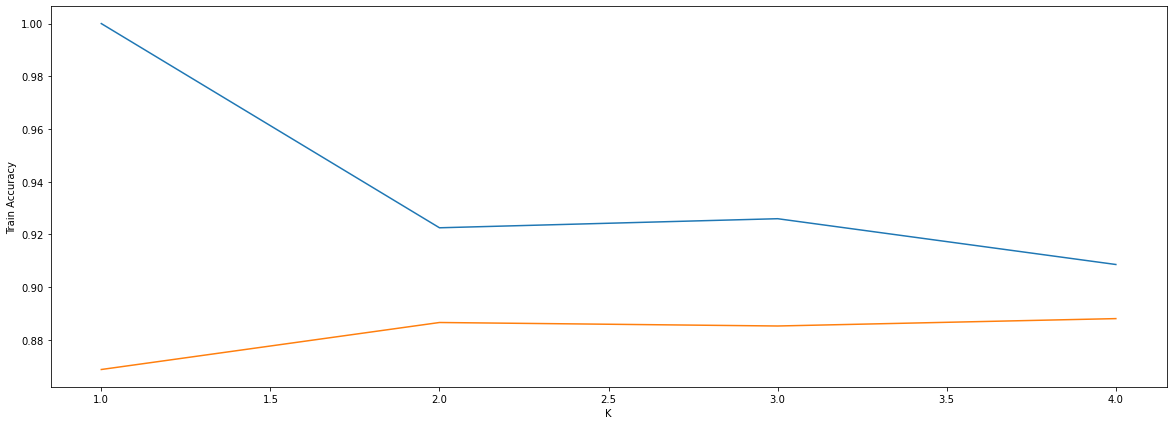

In [38]:
plt.figure(figsize= (20, 7))
sns.lineplot(data = knn_report, x = 'K', y = 'Train Accuracy')
sns.lineplot(data = knn_report, x = 'K', y = 'Test Accuracy');


In [39]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

pre_train = knn.predict(x_train)
pre_test = knn.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_knn = cross_val_score(knn, x_train, y_train, cv = 5)


report = report.append({'Model': 'KNN Classifier',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_knn.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27112   833]
 [ 2386  1316]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94     27945
           2       0.61      0.36      0.45      3702

    accuracy                           0.90     31647
   macro avg       0.77      0.66      0.70     31647
weighted avg       0.88      0.90      0.89     31647

Accuracy Score: 0.8982841975542706
None

Test Metrics
Confusion Matrix: 
 [[11635   342]
 [ 1049   538]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.97      0.94     11977
           2       0.61      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564

Accuracy Score: 0.8974491300501327
None


**Train Accuracy & Test Accuracy** - Accuracy is calculated with the help of  accuracy metrics in Sklearn, by comparing the **True Value** and **Predicted value**. This give the result how good our model is performed over the Train and Test Results over the Predicted Values.

**Cohen Kappa Score** - Helps to test **Interrater Reliability**. Range: -1 to +1, it also helps to answer the question of Consistency
0 - represents yhe amount of agreement that can be expected from random chance, 1 - perfect agreement between the raters.
<=0 - No agreement, 0.01 - 0.20 - none to slight, 0.21 - 0.40 -- Fair Agreement, 0.41 - 0.60 -- Moderate, 0.61 - 0.80 -- Substancial, 
0.81 - 1.00 -- Perfect Agreement.

**Recall** - It quantifies the **number of Positive Class Prediction** made out of all Positive examples in the given Dataset.

**Mean Score** - This can be calculated by the help of **Cross Validation method**, which gives the results to check for **Model Stabillity**. Here for consideration I took **K folds as 5**. For each Fold it took all the samples and consider it for validation and produces the result of Stability.

**Report Analysis**

In [40]:
report

,Model,Train Accuracy,Test Accuracy,Cohen-Kappa Score,Recall,Mean Score
0,Logistic Regression,0.891111,0.889118,0.232069,0.889118,0.891301
1,Decision Tree,1.000000,0.872825,0.396872,0.872825,0.873637
2,Random Forest,1.000000,0.905116,0.457629,0.905116,0.906184
3,Support Vector Machine,0.893323,0.892731,0.228419,0.892731,0.891712
4,Naive Bayes,0.835624,0.838322,0.312755,0.838322,0.837236
5,Gradient Boosting,0.911240,0.903937,0.437820,0.903937,0.904699
6,Ada Boost Classifier,0.898284,0.897449,0.384807,0.897449,0.896515
7,KNN Classifier,0.898284,0.897449,0.384807,0.897449,0.886719


From the result we can see that Random Forest Classifer does a really great job. It has a good accuracy and also a good stability. 

Even though all the models are performing well in Train data, when i consider the recall score it shows very less score, so we can clearly say our model is biased over one particular class of 1.

To solve this problem we have to balance the data by either **Oversampling or Undersampling**. This can be achieved by various dedicated methods like **SMOTE, Near Miss**.


**Model Stability by analysing Cross Validation Score of each Model**

In [41]:
cross_val = pd.DataFrame(columns = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Naive Bayes','Gradient Boosting','Ada Boost Classifier', 'KNN'])
cross_val['Logistic Regression'] = cv_lr
cross_val['Decision Tree'] = cv_dt
cross_val['Random Forest'] = cv_rf
cross_val['Support Vector Machine'] = cv_svm
cross_val['Naive Bayes'] = cv_nb
cross_val['Gradient Boosting'] = cv_gb
cross_val['Ada Boost Classfier'] =  cv_abc
cross_val['KNN'] = cv_knn



cross_val

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,Naive Bayes,Gradient Boosting,Ada Boost Classifier,KNN,Ada Boost Classfier
0,0.893839,0.876777,0.908847,0.891785,0.842812,0.906477,NaN,0.884044,0.896524
1,0.890205,0.876303,0.910111,0.893681,0.828910,0.907267,NaN,0.890679,0.899368
2,0.889714,0.868226,0.904566,0.888766,0.833307,0.904724,NaN,0.885606,0.894770
3,0.889398,0.868700,0.902038,0.889872,0.836625,0.900774,NaN,0.882446,0.895560
4,0.893348,0.878180,0.905356,0.894454,0.844525,0.904250,NaN,0.890820,0.896350


**ROC and AUC Curve**

In [42]:
# Logistic Regression
probs = lr.predict_proba(x_test)
preds = probs[:, 1]
fprlog, tprlog, threshlog = roc_curve(y_test, preds, pos_label = 2)
roc_auclog = auc(fprlog, tprlog)

# Decision Tree
probs = dt.predict_proba(x_test)
preds = probs[:,1]
fprdes, tprdes, threshdes = roc_curve(y_test, preds, pos_label=2)
roc_aucdes = auc(fprdes, tprdes)

# Random Forest
probs = rf.predict_proba(x_test)
preds = probs[:, 1]
fprrf, tprrf, threshrf = roc_curve(y_test, preds, pos_label=2)
roc_aucrf = auc(fprrf, tprrf)

# Naive Bayes
probs = nb.predict_proba(x_test)
preds = probs[:, 1]
fprnb, tprnb, threshnb = roc_curve(y_test, preds, pos_label=2)
roc_aucnb = auc(fprnb, tprnb)

# Gradient Boosting
probs = gb.predict_proba(x_test)
preds = probs[:, 1]
fprgb, tprgb, threshgb = roc_curve(y_test, preds, pos_label=2)
roc_aucgb = auc(fprgb, tprgb)

# Ada Boost Classifier
probs = abc.predict_proba(x_test)
preds = probs[:, 1]
fprabc, tprabc, threshabc = roc_curve(y_test, preds, pos_label=2)
roc_aucabc = auc(fprabc, tprabc)

# K Nearest Neighbors
probs = knn.predict_proba(x_test)
preds = probs[:, 1]
fprknn, tprknn, threshknn = roc_curve(y_test, preds, pos_label=2)
roc_aucknn = auc(fprknn, tprknn)

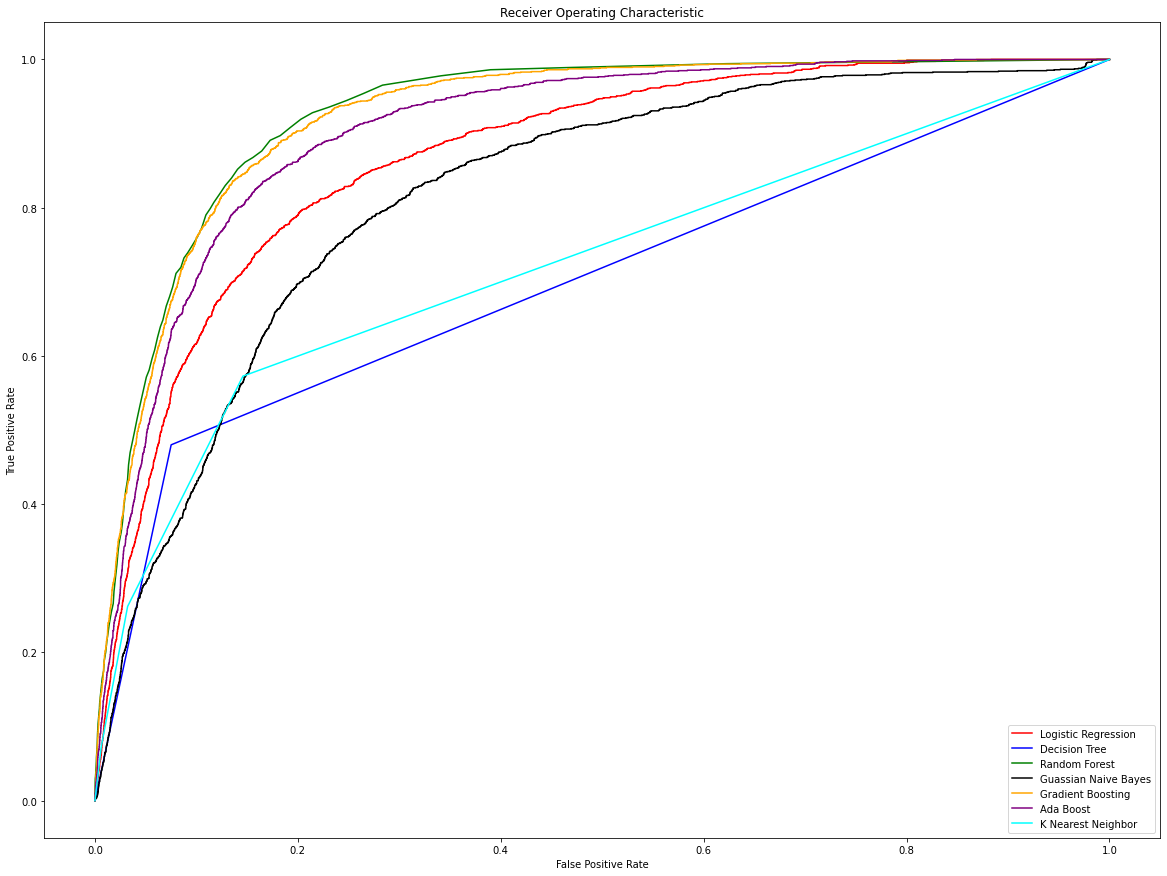

In [43]:
plt.figure(figsize=(20,15))
plt.plot(fprlog, tprlog, label = "Logistic Regression", color = 'red')
plt.plot(fprdes, tprdes, label = "Decision Tree", color = 'blue')
plt.plot(fprrf, tprrf, label = "Random Forest", color = 'green')
plt.plot(fprnb, tprnb, label = "Guassian Naive Bayes", color = 'black')
plt.plot(fprgb, tprgb, label = 'Gradient Boosting', color = 'orange')
plt.plot(fprabc, tprabc, label = 'Ada Boost', color = 'purple')
plt.plot(fprknn, tprknn, label = "K Nearest Neighbor", color = 'cyan')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

**Balancing the Dataset:**

Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class).

Generally, the imbalance is a problem of class imbalance, mostly we are interested in the positive class/minority class. If the imbalance data is not treated properly, the model may not be able to learn the data well, it may bias over one majority class. This results in high bias problem in the model.
Hence we need to bias the model.

**Problem**:
 In the given problem, we have two class that are subscribed and not subscribed, where So a binary classifier model need not be a complex model to predict all outcomes as 1 meaning not - subscribed and achieve a great accuracy of 99%. Clearly, in such cases where class distribution is skewed, the accuracy metric is biased and not preferable.


**Solution**:
To overcome this overfitting problem, we have technique called **SMOTE**. 

*SMOTE - Synthetic Minority Over-Sampling Technique*


SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to *overcome the overfitting problem* posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


In [44]:
x.head(), y.head()

(   Age  Job  Marital Status  Education  Credit  Balance (euros)  Housing Loan  \
 0   58    4               1          2       0             2143             1   
 1   44    9               2          1       0               29             1   
 2   33    2               1          1       0                2             1   
 3   47    1               1          3       0             1506             1   
 4   33   11               2          3       0                1             0   
 
    Personal Loan  Contact  Last Contact Day  Last Contact Month  \
 0              0        2                 5                   8   
 1              0        2                 5                   8   
 2              1        2                 5                   8   
 3              0        2                 5                   8   
 4              0        2                 5                   8   
 
    Last Contact Duration  Campaign  Pdays  Previous  Poutcome  
 0                    261      

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31647, 16), (31647,), (13564, 16), (13564,))

**Balancing Dataset**

In [46]:
sm = SMOTE()
x_train, y_train = sm.fit_sample(x_train, y_train)
x_train.shape, y_train.shape

((55850, 16), (55850,))

In [47]:
y_train.value_counts(normalize = True)

1    0.5
2    0.5
Name: Subscription, dtype: float64

In [48]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Logistic Regression**

In [49]:
report = pd.DataFrame(columns = ['Model', 'Train Accuracy','Test Accuracy','Cohen-Kappa Score','Recall', 'Mean Score'])
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)
y_pred1 = lr.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

acc_lr_train = accuracy_score(y_train, y_pred)
acc_lr_test = accuracy_score(y_test, y_pred1)

cv_lr = cross_val_score(lr, x_train, y_train, cv = 5)

report = report.append({'Model': 'Logistic Regression',
                        'Train Accuracy': acc_lr_train,
                        'Test Accuracy': acc_lr_test,
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_lr.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[23069  4856]
 [ 3311 24614]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.87      0.83      0.85     27925
           2       0.84      0.88      0.86     27925

    accuracy                           0.85     55850
   macro avg       0.85      0.85      0.85     55850
weighted avg       0.85      0.85      0.85     55850

Accuracy Score: 0.8537690241718889
None

Test Metrics
Confusion Matrix: 
 [[9899 2098]
 [ 493 1074]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.83      0.88     11997
           2       0.34      0.69      0.45      1567

    accuracy                           0.81     13564
   macro avg       0.65      0.76      0.67     13564
weighted avg       0.88      0.81      0.83     13564

Accuracy Score: 0.8089796520200531
None


From the Result of Logistic Model, we can analyse the train and test score are almost similar, that doesn't show that the data is not overfitted over the model. so we can rely on the result of Logistic Regression, after balancing. 

Let's try other models like Random Forest, SVM etc., to see if we can increase the reliability of the model.


**Decision Tree Classifier**

In [50]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_train)
y_pred1 = dt.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

acc_dt_train = accuracy_score(y_train, y_pred)
acc_dt_test = accuracy_score(y_test, y_pred1)

cv_dt = cross_val_score(dt, x_train, y_train, cv = 5)

report = report.append({'Model': 'Decision Tree',
                        'Train Accuracy': acc_dt_train,
                        'Test Accuracy': acc_dt_test,
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_dt.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27925     0]
 [    0 27925]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27925
           2       1.00      1.00      1.00     27925

    accuracy                           1.00     55850
   macro avg       1.00      1.00      1.00     55850
weighted avg       1.00      1.00      1.00     55850

Accuracy Score: 1.0
None

Test Metrics
Confusion Matrix: 
 [[10651  1346]
 [  676   891]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.89      0.91     11997
           2       0.40      0.57      0.47      1567

    accuracy                           0.85     13564
   macro avg       0.67      0.73      0.69     13564
weighted avg       0.88      0.85      0.86     13564

Accuracy Score: 0.8509289295193159
None


**Random Forest Classifier**

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_train)
y_pred1 = rf.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_rf = cross_val_score(rf, x_train, y_train, cv = 5)


report = report.append({'Model': 'Random Forest',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_rf.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27925     0]
 [    1 27924]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27925
           2       1.00      1.00      1.00     27925

    accuracy                           1.00     55850
   macro avg       1.00      1.00      1.00     55850
weighted avg       1.00      1.00      1.00     55850

Accuracy Score: 0.9999820948970457
None

Test Metrics
Confusion Matrix: 
 [[10964  1033]
 [  530  1037]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93     11997
           2       0.50      0.66      0.57      1567

    accuracy                           0.88     13564
   macro avg       0.73      0.79      0.75     13564
weighted avg       0.90      0.88      0.89     13564

Accuracy Score: 0.8847685048658213
None


**Support Vector Machine**

In [52]:
svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_train)
y_pred1 = svm.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_svm = cross_val_score(svm, x_train, y_train, cv = 5)


report = report.append({'Model': 'Support Vector Machine',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_svm.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[24280  3645]
 [ 2984 24941]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.89      0.87      0.88     27925
           2       0.87      0.89      0.88     27925

    accuracy                           0.88     55850
   macro avg       0.88      0.88      0.88     55850
weighted avg       0.88      0.88      0.88     55850

Accuracy Score: 0.881307072515667
None

Test Metrics
Confusion Matrix: 
 [[10423  1574]
 [  588   979]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.87      0.91     11997
           2       0.38      0.62      0.48      1567

    accuracy                           0.84     13564
   macro avg       0.67      0.75      0.69     13564
weighted avg       0.88      0.84      0.86     13564

Accuracy Score: 0.8406074904158065
None


**Gradient Boosting**

In [53]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_train)
y_pred1 = gb.predict(x_test)


print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_gb = cross_val_score(gb, x_train, y_train, cv = 5)


report = report.append({'Model': 'Gradient Boosting',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_gb.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[24413  3512]
 [ 2267 25658]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.87      0.89     27925
           2       0.88      0.92      0.90     27925

    accuracy                           0.90     55850
   macro avg       0.90      0.90      0.90     55850
weighted avg       0.90      0.90      0.90     55850

Accuracy Score: 0.8965264100268576
None

Test Metrics
Confusion Matrix: 
 [[10466  1531]
 [  400  1167]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.87      0.92     11997
           2       0.43      0.74      0.55      1567

    accuracy                           0.86     13564
   macro avg       0.70      0.81      0.73     13564
weighted avg       0.90      0.86      0.87     13564

Accuracy Score: 0.8576378649365969
None


**K Nearest Neighbours**

100%|██████████| 4/4 [04:29<00:00, 67.30s/it]


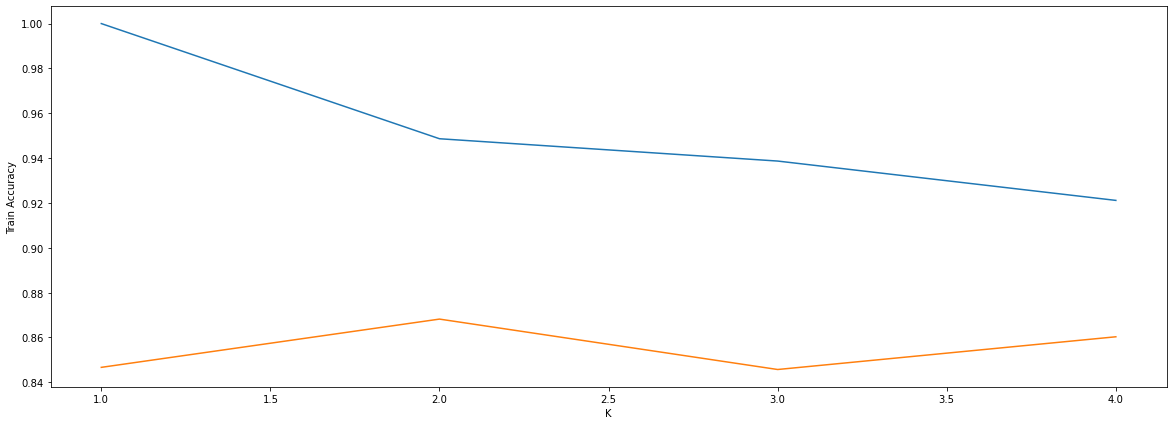

In [54]:
from tqdm import tqdm
knn_report = pd.DataFrame(columns = ['K', 'Train Accuracy', 'Test Accuracy'])
for i in tqdm(range(1, 5)):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    
    pre_train = knn.predict(x_train)
    pre_test = knn.predict(x_test)
    
    knn_report = knn_report.append({'K': i,
                                    'Train Accuracy': accuracy_score(y_train, pre_train),
                                    'Test Accuracy': accuracy_score(y_test, pre_test)}, ignore_index = True)
    knn_report
    
    
knn_report    
plt.figure(figsize= (20, 7))
sns.lineplot(data = knn_report, x = 'K', y = 'Train Accuracy')
sns.lineplot(data = knn_report, x = 'K', y = 'Test Accuracy');


In [55]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

pre_train = knn.predict(x_train)
pre_test = knn.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_knn = cross_val_score(knn, x_train, y_train, cv = 5)


report = report.append({'Model': 'KNN Classifier',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted'),
                        'Mean Score': cv_knn.mean()}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[24413  3512]
 [ 2267 25658]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.87      0.89     27925
           2       0.88      0.92      0.90     27925

    accuracy                           0.90     55850
   macro avg       0.90      0.90      0.90     55850
weighted avg       0.90      0.90      0.90     55850

Accuracy Score: 0.8965264100268576
None

Test Metrics
Confusion Matrix: 
 [[10466  1531]
 [  400  1167]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.87      0.92     11997
           2       0.43      0.74      0.55      1567

    accuracy                           0.86     13564
   macro avg       0.70      0.81      0.73     13564
weighted avg       0.90      0.86      0.87     13564

Accuracy Score: 0.8576378649365969
None


In [56]:
report

,Model,Train Accuracy,Test Accuracy,Cohen-Kappa Score,Recall,Mean Score
0,Logistic Regression,0.853769,0.808980,0.353236,0.808980,0.850295
1,Decision Tree,1.000000,0.850929,0.384875,0.850929,0.887610
2,Random Forest,0.999982,0.884769,0.505179,0.884769,0.923885
3,Support Vector Machine,0.881307,0.840607,0.387557,0.840607,0.872426
4,Gradient Boosting,0.896526,0.857638,0.469741,0.857638,0.886750
5,KNN Classifier,0.896526,0.857638,0.469741,0.857638,0.876616


In [57]:
cross_val = pd.DataFrame(columns = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Gradient Boosting', 'KNN'])
cross_val['Logistic Regression'] = cv_lr
cross_val['Decision Tree'] = cv_dt
cross_val['Random Forest'] = cv_rf
cross_val['Support Vector Machine'] = cv_svm
cross_val['Gradient Boosting'] = cv_gb
cross_val['KNN'] = cv_knn
cross_val

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,Gradient Boosting,KNN
0,0.774038,0.815309,0.845927,0.781021,0.808774,0.778424
1,0.870546,0.905461,0.940466,0.895703,0.904655,0.900627
2,0.870636,0.905640,0.946285,0.895434,0.908326,0.896956
3,0.869203,0.904566,0.945300,0.897762,0.908505,0.905103
4,0.867055,0.907073,0.941450,0.892211,0.903491,0.901970


In [58]:
# Logistic Regression
probs = lr.predict_proba(x_test)
preds = probs[:, 1]
fprlog, tprlog, threshlog = roc_curve(y_test, preds, pos_label = 2)
roc_auclog = auc(fprlog, tprlog)

# Decision Tree
probs = dt.predict_proba(x_test)
preds = probs[:,1]
fprdes, tprdes, threshdes = roc_curve(y_test, preds, pos_label=2)
roc_aucdes = auc(fprdes, tprdes)

# Random Forest
probs = rf.predict_proba(x_test)
preds = probs[:, 1]
fprrf, tprrf, threshrf = roc_curve(y_test, preds, pos_label=2)
roc_aucrf = auc(fprrf, tprrf)

# Gradient Boosting
probs = gb.predict_proba(x_test)
preds = probs[:, 1]
fprgb, tprgb, threshgb = roc_curve(y_test, preds, pos_label=2)
roc_aucgb = auc(fprgb, tprgb)

# K Nearest Neighbors
probs = knn.predict_proba(x_test)
preds = probs[:, 1]
fprknn, tprknn, threshknn = roc_curve(y_test, preds, pos_label=2)
roc_aucknn = auc(fprknn, tprknn)

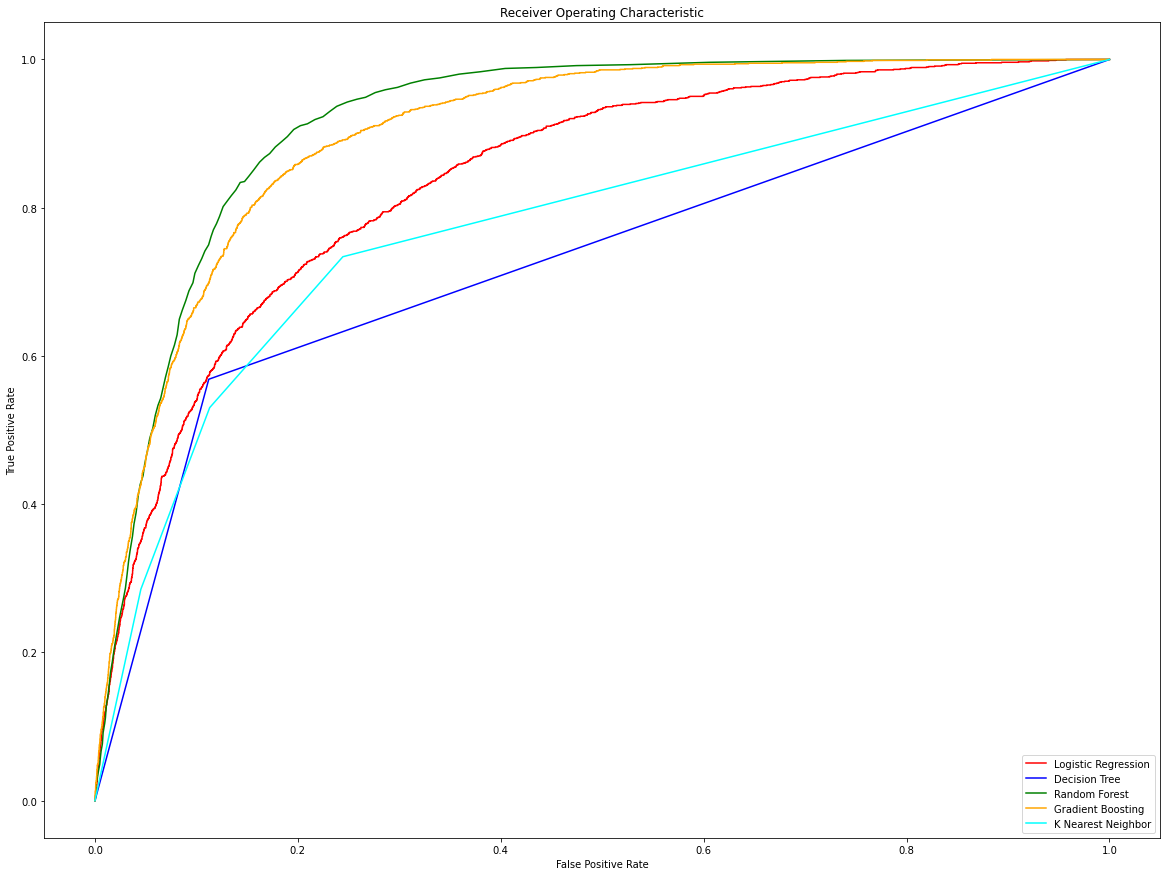

In [59]:
plt.figure(figsize=(20,15))
plt.plot(fprlog, tprlog, label = "Logistic Regression", color = 'red')
plt.plot(fprdes, tprdes, label = "Decision Tree", color = 'blue')
plt.plot(fprrf, tprrf, label = "Random Forest", color = 'green')
plt.plot(fprgb, tprgb, label = 'Gradient Boosting', color = 'orange')
plt.plot(fprknn, tprknn, label = "K Nearest Neighbor", color = 'cyan')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

The best pick model is **RandomForestClassifier** for this problem, even though it yields better result. The model is overfitted, so to solve those overfitting in traning data, we can adjust the parameter to get better results.


For adjusting the parameter we can access over certain parameters like,
* To Increase model's reliabiity:

1) Max depth
2) N_Estimators
3) Min_Sample_split
4) Min_Sample_leaf

* To increase the speed of calculation:

1) oob_score
2) n_jobs



**HyperTuning**

In [60]:
hyper_tuned_rf_report = pd.DataFrame(columns = ['Model', 'Train Accuracy','Test Accuracy','Cohen-Kappa Score','Recall'])

In [61]:
rf1 = RandomForestClassifier(n_estimators= 50, max_depth = 5, n_jobs= 4)
rf1.fit(x_train, y_train)


y_pred = rf1.predict(x_train)
y_pred1 = rf1.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

hyper_tuned_rf_report = hyper_tuned_rf_report.append({'Model': 'RF Hypertuned 1',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted')}, ignore_index= True)


Train Metrics
Confusion Matrix: 
 [[23179  4746]
 [ 2482 25443]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.83      0.87     27925
           2       0.84      0.91      0.88     27925

    accuracy                           0.87     55850
   macro avg       0.87      0.87      0.87     55850
weighted avg       0.87      0.87      0.87     55850

Accuracy Score: 0.8705819158460161
None

Test Metrics
Confusion Matrix: 
 [[9896 2101]
 [ 377 1190]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.82      0.89     11997
           2       0.36      0.76      0.49      1567

    accuracy                           0.82     13564
   macro avg       0.66      0.79      0.69     13564
weighted avg       0.89      0.82      0.84     13564

Accuracy Score: 0.8173105278678856
None


In [62]:
rf2 = RandomForestClassifier(n_estimators= 75, max_depth = 100, max_features='auto', n_jobs= 4)
rf2.fit(x_train, y_train)


y_pred = rf2.predict(x_train)
y_pred1 = rf2.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

hyper_tuned_rf_report = hyper_tuned_rf_report.append({'Model': 'RF Hypertuned 2',
                        'Train Accuracy': accuracy_score(y_train, y_pred),
                        'Test Accuracy': accuracy_score(y_test, y_pred1),
                        'Cohen-Kappa Score': cohen_kappa_score(y_test, y_pred1),
                        'Recall': recall_score(y_test, y_pred1, average = 'weighted')}, ignore_index= True)

Train Metrics
Confusion Matrix: 
 [[27923     2]
 [    1 27924]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27925
           2       1.00      1.00      1.00     27925

    accuracy                           1.00     55850
   macro avg       1.00      1.00      1.00     55850
weighted avg       1.00      1.00      1.00     55850

Accuracy Score: 0.999946284691137
None

Test Metrics
Confusion Matrix: 
 [[10970  1027]
 [  532  1035]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93     11997
           2       0.50      0.66      0.57      1567

    accuracy                           0.89     13564
   macro avg       0.73      0.79      0.75     13564
weighted avg       0.90      0.89      0.89     13564

Accuracy Score: 0.8850634031259216
None


In [63]:
params = {'n_estimators': [75, 80, 85, 100],
          'n_jobs': [4],
          'max_features': ['auto', 10],
          'max_depth': [50, 60, 70]}

rf = RandomForestClassifier()
gscv = GridSearchCV(rf, params)
gscv.fit(x_train, y_train)

print('Best Score: ', gscv.best_score_)
print('Best Parameter: ', gscv.best_params_) 


Best Score:  0.9242256042972248
Best Parameter:  {'max_depth': 60, 'max_features': 'auto', 'n_estimators': 75, 'n_jobs': 4}


In [64]:
hyper_tuned_rf_report

,Model,Train Accuracy,Test Accuracy,Cohen-Kappa Score,Recall
0,RF Hypertuned 1,0.870582,0.817311,0.395257,0.817311
1,RF Hypertuned 2,0.999946,0.885063,0.505483,0.885063


#### **ROC and AUC Curve**

In [65]:
# Hyper Parameter Tuning 1
probs = rf1.predict_proba(x_test)
preds = probs[:, 1]
fprrf1, tprrf1, threshrf1 = roc_curve(y_test, preds, pos_label=2)
roc_aucrf = auc(fprrf1, tprrf1)

# Hyper Parameter Tuning 2
probs = rf2.predict_proba(x_test)
preds = probs[:, 1]
fprrf2, tprrf2, threshrf2 = roc_curve(y_test, preds, pos_label=2)
roc_aucrf = auc(fprrf2, tprrf2)



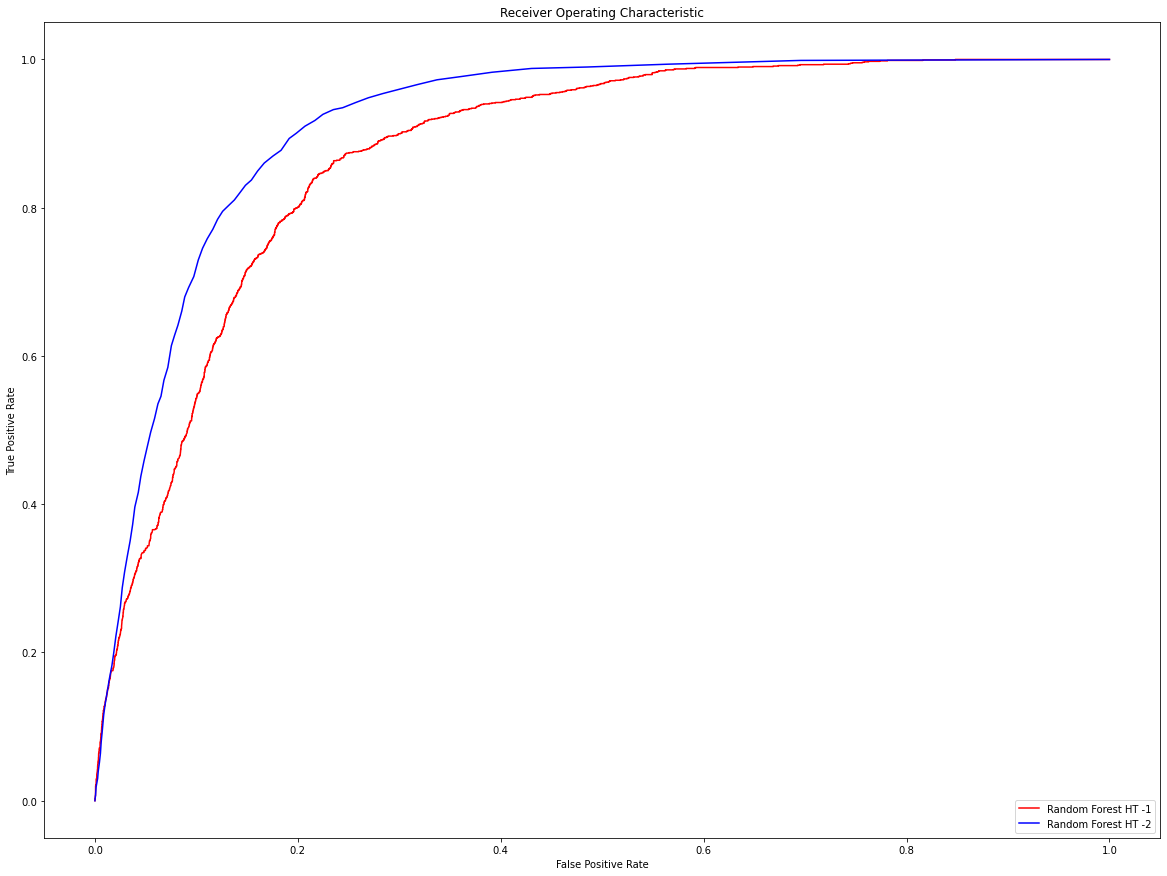

In [66]:
plt.figure(figsize=(20,15))
plt.plot(fprrf1, tprrf1, label = "Random Forest HT -1", color = 'red')
plt.plot(fprrf2, tprrf2, label = "Random Forest HT -2", color = 'blue')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

In [67]:
rf = RandomForestClassifier(max_depth= 60, max_features='auto', n_estimators= 1000, n_jobs=4 , max_leaf_nodes=1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
y_pred1 = rf.predict(x_test)

print('Train Metrics')
print(metrics(y_train, y_pred))
print('\nTest Metrics')
print(metrics(y_test, y_pred1))

cv_rf = cross_val_score(rf, x_train, y_train, cv = 5)
cv_test_rf = cross_val_score(rf, x_test, y_test, cv = 5)


Train Metrics
Confusion Matrix: 
 [[25918  2007]
 [ 1079 26846]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.93      0.94     27925
           2       0.93      0.96      0.95     27925

    accuracy                           0.94     55850
   macro avg       0.95      0.94      0.94     55850
weighted avg       0.95      0.94      0.94     55850

Accuracy Score: 0.9447448522829006
None

Test Metrics
Confusion Matrix: 
 [[10749  1248]
 [  451  1116]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.90      0.93     11997
           2       0.47      0.71      0.57      1567

    accuracy                           0.87     13564
   macro avg       0.72      0.80      0.75     13564
weighted avg       0.90      0.87      0.89     13564

Accuracy Score: 0.8747419640224122
None


In [68]:
print('Train Cross Validation Report ')
print("Mean Score of Model: ", cv_rf.mean())
print('Cross Validation Score: ', cv_rf)

print('\nTest Cross Validation Report')
print('Mean Score: ', cv_test_rf.mean())
print('Cross Validation Score: ', cv_test_rf)

Train Cross Validation Report 
Mean Score of Model:  0.9077350044762758
Cross Validation Score:  [0.83213966 0.92309758 0.93025962 0.92900627 0.92417189]

Test Cross Validation Report
Mean Score:  0.9048215899193982
Cross Validation Score:  [0.90195356 0.91043126 0.90047917 0.9063767  0.90486726]


In [69]:
import os
import pickle

path = os.getcwd()
filename = 'randomforest.pkl'

# Pickling the model in a Current Working Directory
pickle.dump(rf, open(path + '\\'+ filename, 'wb'))

**Steps**:

* The given dataset is unbalanced and biased over unsubscribed customers, by analysing the data and even build the model along with unbalancing problem, provide better results but the results what we earned not so confident. Because the model is learned and biased over majority in the dataset.


* After this, I tried to solve the problem of unbalancing by using **SMOTE**, which is the best method of oversampling to solve this unbalancing problem. By fitting the training samples into the model, we can generate new samples from the minority class.


* After completing, I tried to build the model with the help of **HyperTuning**, which is the best method to improve the model's reliability.


**Conclusion**:

Without sampling the dataset, the **Logistic Regression and Gradient Boosting** did a great job than any other models and the results are also more reliable.

After sampling the dataset by using **SMOTE**, **Random Forest** provide a better result, so I took **Random Forest** as a base model and did hypertuning to reduce the overfitting by controlling important parameters.

So in final, the results are based on 95% confidence interval, where the **Mean Score** of train accuracy is approxiamated over *91%* and test accuracy is approximated over *90%*.

By using this model we can earn results with better accuracy and reliable results for the given input. And the model Deployment phase is taken in seperate phase with the help of **Streamlit** Application, which is easy to use and implement. With the help of this model, we can predict the customer's subscription status. 